<a href="https://colab.research.google.com/github/rahiakela/mathematics-for-machine-learning/blob/main/deep-learning-book-maths/2_12_principal_components_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Principal Components Analysis

Dimensions are a crucial topic in data science. The dimensions are all the features of the dataset. For instance, if you are looking at a dataset containing pieces of music, dimensions could be the genre, the length of the piece, the number of instruments, the presence of a singer etc. You can imagine all these dimensions as different columns. When there is only two dimensions, it is very convenient to plot: you can use the $x$- and $y$-axis. Add color and you can represent a third dimension. It is similar if you have tens or hundereds of dimensions, it will just be harder to visualize it.

When you have that many dimensions it happens that some of them are correlated. For instance, we can reasonably think that the genre dimension will correlate with the instruments dimensions in our previous example. One way to reduce dimensionality is simply to keep only some of them. The problem is that you loose good information. It would be nice to have a way to reduce these dimensions while keeping all the information present in the data set.

The aim of principal components analysis (PCA) is generaly to reduce the number of dimensions of a dataset where dimensions are not completly decorelated. PCA provides us with a new set of dimensions, the principal components (PC). They are ordered: the first PC is the dimension having the largest variance. In addition, each PC is orthogonal to the preceding one. Remember that orthogonal vectors means that their dot product is equal to $0$ (see [2.6](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.6-Special-Kinds-of-Matrices-and-Vectors/)). This means that each PC is decorelated to the preceding one. It is way better than feature selection where you loose a lot of information.

##Setup

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def plot_vectors(vecs, cols, alpha=1):
  """
  Plot set of vectors.

  Parameters
  ----------
  vecs : array-like
      Coordinates of the vectors to plot. Each vectors is in an array. For
      instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
  cols : array-like
      Colors of the vectors. For instance: ['red', 'blue'] will display the
      first vector in red and the second in blue.
  alpha : float
      Opacity of vectors

  Returns:

  fig : instance of matplotlib.figure.Figure
      The figure of the vectors
  """
  plt.axvline(x=0, color='#A9A9A9', zorder=0)
  plt.axhline(y=0, color='#A9A9A9', zorder=0)

  for i in range(len(vecs)):
      if (isinstance(alpha, list)):
          alpha_i = alpha[i]
      else:
          alpha_i = alpha
      x = np.concatenate([[0,0],vecs[i]])
      plt.quiver([x[0]],
                  [x[1]],
                  [x[2]],
                  [x[3]],
                  angles='xy', scale_units='xy', scale=1, color=cols[i],
                alpha=alpha_i)

## Describing the problem

###Example 1: Orthogonal vector

Unit vectors are an example of orthogonal vectors:

<img src="images/orthogonal-vectors.png" width="200" alt="Example of orthogonal vectors" title="Orthogonal vectors">

<em>Orthogonal vectors</em>

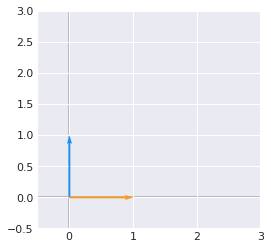

In [ ]:
orange = '#FF9A13'
blue = '#1190FF'

i = [0, 1]
j = [1, 0]

plot_vectors([i, j], [[blue], [orange]])
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.show()

We will apply

$$
{A}=\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

to $i$ and $j$. You can notice that this matrix is special: it is diagonal. So it will only rescale our space. No rotation here. More precisely, it will rescale each dimension the same way because the diagonal values are identical. 

Let's create the matrix ${A}$:

In [ ]:
A = np.array([
  [2, 0],
  [0, 2]
])
A

array([[2, 0],
       [0, 2]])

Now we will apply ${A}$ on our two unit vectors $i$ and $j$ and plot the resulting new vectors:

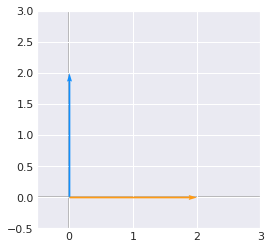

In [ ]:
new_i = A.dot(i)
new_j = A.dot(j)

plot_vectors([new_i, new_j], [['#1190FF'], ['#FF9A13']])
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.show()

As expected, we can see that the square corresponding to $i$ and $j$ didn't rotate but the lengths of $i$ and $j$ have doubled. 

We will now calculate the determinant of ${A}$ (you can go to the [Wikipedia article](https://en.wikipedia.org/wiki/Determinant) for more details about the calculation of the determinant):

<img src="https://github.com/rahiakela/mathematics-for-machine-learning/blob/main/deep-learning-book-maths/images/unit-square-area-transformed.png?raw=1" width="300" alt="Areas of the unit square and its transformation by the matrix" title="The transformed unit square">

<em>The unit square transformed by the matrix</em>

In [ ]:
np.linalg.det(A)

4.0

And yes, the transformation have multiplied the area of the unit square by 4. The lengths of $new_i$ and $new_j$ are $2$ (thus $2\cdot2=4$).

##Example 2: Negative determinant

Let's see now an example of negative determinant.

We will transform the unit square with the matrix:

$$
{B}=\begin{bmatrix}
    -2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

Its determinant is $-4$:

In [ ]:
B = np.array([
  [-2, 0],
  [0, 2]
])

np.linalg.det(B)

-4.0

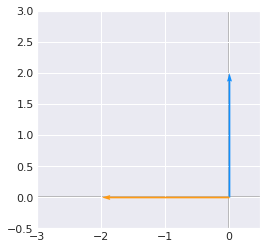

In [ ]:
new_i_1 = B.dot(i)
new_j_1 = B.dot(j)

plot_vectors([new_i_1, new_j_1], [['#1190FF'], ['#FF9A13']])
plt.xlim(-3, 0.5)
plt.ylim(-0.5, 3)
plt.show()

We can see that the matrices with determinant $2$ and $-2$ modified the area of the unit square the same way.

<img src="https://github.com/rahiakela/mathematics-for-machine-learning/blob/main/deep-learning-book-maths/images/unit-square-area-transformed-1.png?raw=1" width="300" alt="Areas of the unit square and its transformation by the matrix with a negative determinant" title="The transformed unit square">

<em>The unit square transformed by the matrix with a negative determinant</em>

The absolute value of the determinant shows that, as in the first example, the area of the new square is 4 times the area of the unit square. But this time, it was not just a rescaling but also a transformation. It is not obvious with only the unit vectors so let's transform some random points. We will use the matrix

$$
{C}=\begin{bmatrix}
    -1 & 0\\\\
    0 & 1
\end{bmatrix}
$$

that has a determinant equal to $-1$ for simplicity:

In [ ]:
# Some random points
points = np.array([
  [1, 3], 
  [2, 2], 
  [3, 1], 
  [4, 7], 
  [5, 4]
])

C = np.array([
  [-1, 0],
  [0, 1]
])

np.linalg.det(C)

-1.0

Since the determinant is $-1$, the area of the space will not be changed. 

However, since it is negative we will observe a transformation that we can't obtain through rotation:

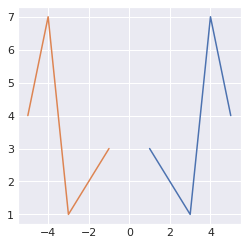

In [ ]:
newPoints = points.dot(C)

plt.figure()
plt.plot(points[:, 0], points[:, 1])
plt.plot(newPoints[:, 0], newPoints[:, 1])
plt.show()

You can see that the transformation mirrored the initial shape.

##Conclusion

We have seen that the determinant of a matrix is a special value telling us a lot of things on the transformation corresponding to this matrix. Now hang on and go to the *last chapter* on the Principal Component Analysis (PCA).

## References

**Linear transformations**

- [Nykamp DQ, “Determinants and linear transformations.” From Math Insight](https://mathinsight.org/determinant_linear_transformation)

- [Determinant intuition - SE](https://math.stackexchange.com/questions/668/whats-an-intuitive-way-to-think-about-the-determinant)

**Numpy**

- [Numpy determinant](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.det.html)